In [2]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
import numpy as np
import json
import time
DB_PATH = 'database/fair_sampling.db'

In [38]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	od_variance,
    disc_fair_sampling,
    qfi_fair_sampling,
    post_anneal_od_variance,
    disc_post_anneal,
    qfi_post_anneal,
    reduced_gs
FROM
	instances_N16
WHERE
	post_anneal_od_variance IS NOT NULL;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [39]:
df

,od_variance,disc_fair_sampling,qfi_fair_sampling,post_anneal_od_variance,disc_post_anneal,qfi_post_anneal,reduced_gs
0,0.013889,3,0.222222,1.393923e-02,3,0.234399,"[18319, 18334, 26527]"
1,0.015625,2,0.250000,1.561641e-02,2,0.246044,"[19522, 23746]"
2,0.015625,2,0.250000,1.562127e-02,2,0.249840,"[9347, 9377]"
3,0.015625,2,0.250000,1.560984e-02,2,0.243303,"[16672, 20832]"
4,0.062500,4,1.000000,1.019535e-08,1,0.000198,"[8003, 20297]"
...,...,...,...,...,...,...,...
640,0.013889,3,0.222222,1.402990e-02,3,0.240350,"[2318, 16654, 22798]"
641,0.250000,8,4.000000,3.273035e-08,1,0.001447,"[2969, 18250]"
642,0.062500,4,1.000000,1.202869e-06,4,0.000288,"[2620, 18957]"
643,0.070400,7,1.360000,1.790114e-02,4,0.336685,"[10656, 11682, 14754, 44448, 49032]"


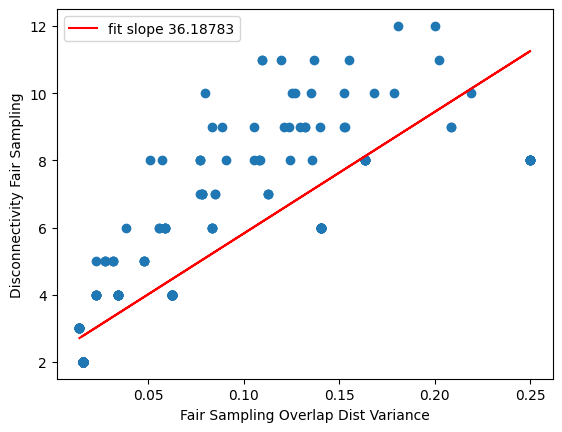

In [29]:
plt.scatter(df["od_variance"], df["disc_fair_sampling"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["od_variance"], df["disc_fair_sampling"], 1)

# Calculate the predicted values
fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Fair Sampling Overlap Dist Variance")
plt.ylabel("Disconnectivity Fair Sampling")

plt.legend()

plt.show()

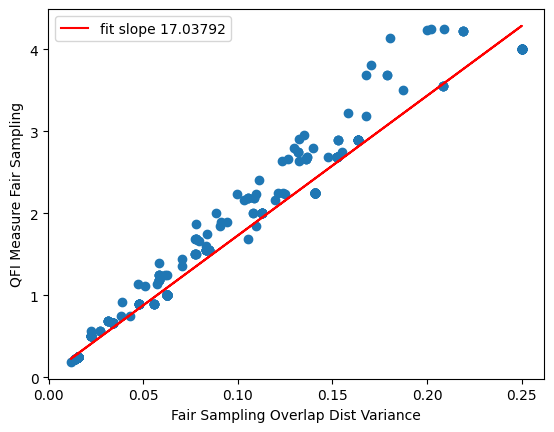

In [36]:
plt.scatter(df["od_variance"], df["qfi_fair_sampling"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["od_variance"], df["qfi_fair_sampling"], 1)

# Calculate the predicted values
fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Fair Sampling Overlap Dist Variance")
plt.ylabel("QFI Measure Fair Sampling")

plt.legend()

plt.show()

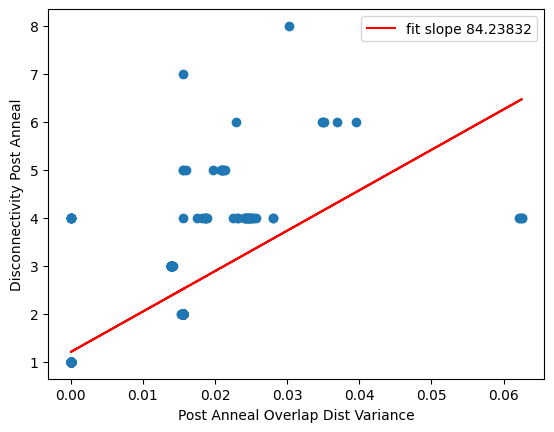

In [30]:
plt.scatter(df["post_anneal_od_variance"], df["disc_post_anneal"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["post_anneal_od_variance"], df["disc_post_anneal"], 1)

# Calculate the predicted values
fit_line = slope * df["post_anneal_od_variance"] + intercept

# Plot the fit line
plt.plot(df["post_anneal_od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Post Anneal Overlap Dist Variance")
plt.ylabel("Disconnectivity Post Anneal")

plt.legend()

plt.show()

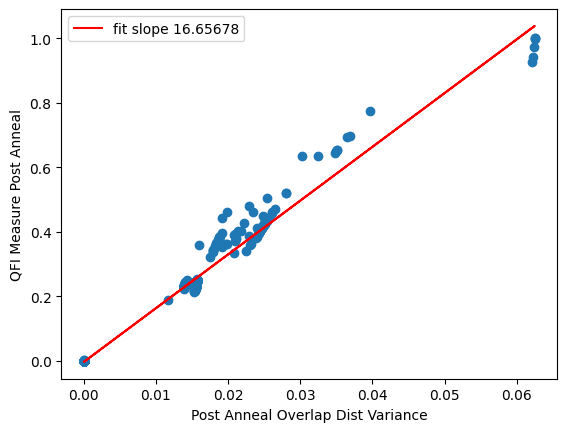

In [37]:
plt.scatter(df["post_anneal_od_variance"], df["qfi_post_anneal"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["post_anneal_od_variance"], df["qfi_post_anneal"], 1)

# Calculate the predicted values
fit_line = slope * df["post_anneal_od_variance"] + intercept

# Plot the fit line
plt.plot(df["post_anneal_od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Post Anneal Overlap Dist Variance")
plt.ylabel("QFI Measure Post Anneal")

plt.legend()

plt.show()

In [63]:

def state_eigenvalue(i, N):
    return np.sum(np.array([1 - 2*int(s) for s in bin(i)[2:].zfill(N)]))


def kwon_macro_measure(state, N):
    sigma = np.ceil(np.sqrt(N))
    rho = np.outer(state,state)
    rho_1 = np.outer(state,state)

    for i in range(len(rho)):
        for j in range(i+1,len(rho[0])):
            rho_1[i][j] = rho_1[j][i] = rho_1[i][j] * np.exp(-(((state_eigenvalue(i,N) - state_eigenvalue(j,N))/2)**2)/(8*(sigma**2)))

    fid = qml.math.fidelity(rho, rho_1)
    return 2 - 2*(np.sqrt(fid))

In [97]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	qfi_fair_sampling,
    od_variance,
	reduced_gs,
    post_anneal_gs_probs
FROM
	instances_N8
WHERE
	post_anneal_gs_probs IS NOT NULL
LIMIT 1000;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


df

,qfi_fair_sampling,od_variance,reduced_gs,post_anneal_gs_probs
0,2.000000,0.250000,"[9, 30]","[0.49999968442437287, 0.4999996844643138]"
1,2.000000,0.250000,"[3, 58]","[0.45877762410860073, 0.541221744780083]"
2,1.120000,0.109600,"[196, 236, 100, 103, 110]","[0.11840619721519985, 0.2092703013949273, 0.34..."
3,1.333333,0.135802,"[18, 210, 212]","[0.22321732049983317, 0.5535636996468495, 0.22..."
4,1.333333,0.135802,"[78, 71, 119]","[0.22321732047993717, 0.5535636997196826, 0.22..."
...,...,...,...,...
995,0.500000,0.062500,"[123, 125]","[0.4999992235628611, 0.4999992235627012]"
996,1.777778,0.191358,"[101, 9, 12]","[6.45582795001947e-13, 0.4999994338324489, 0.4..."
997,0.444444,0.055556,"[11, 79, 107]","[0.3333326414847757, 0.3333326414851299, 0.333..."
998,0.444444,0.055556,"[39, 71, 111]","[0.33333271719110974, 0.3333327171910883, 0.33..."


In [102]:
# state = [1/np.sqrt(2),0,0,1/np.sqrt(2)]

N = 8
sigma = 5

kwon_fs = []
kwon_pa = []

for index,row  in df.iterrows():

    # start_1 = time.time()

    reduced_gs = json.loads(row["reduced_gs"])
    pa_gs_probs = json.loads(row['post_anneal_gs_probs'])
    fs_rho = np.zeros((2**N,2**N))
    fs_phi = np.zeros((2**N,2**N))
    pa_rho = np.zeros((2**N,2**N))
    pa_phi = np.zeros((2**N,2**N))

    for i,gsi in enumerate(reduced_gs):
        for j,gsj in enumerate(reduced_gs):
            kraus_factor = np.exp(-(((state_eigenvalue(i,N) - state_eigenvalue(j,N))/2)**2)/(8*(sigma**2)))
            # print(kraus_factor)
            fs_rho[gsi][gsj] = fs_rho[gsj][gsi] = 1/len(reduced_gs)
            fs_phi[gsi][gsj] = fs_phi[gsj][gsi] = 1/len(reduced_gs) * kraus_factor
            pa_rho[gsi][gsj] = pa_rho[gsj][gsi] = np.sqrt(pa_gs_probs[i])*np.sqrt(pa_gs_probs[j])
            pa_phi[gsi][gsj] = pa_phi[gsj][gsi] = np.sqrt(pa_gs_probs[i])*np.sqrt(pa_gs_probs[j]) * kraus_factor

    # end_1 = time.time()
    # print(end_1 - start_1)


    # start_2 = time.time()
            
    # print(fs_rho[9][9])
    # print(fs_phi[9][9])
    
    fs_fid = qml.math.fidelity(fs_rho,fs_phi)
    pa_fid = qml.math.fidelity(pa_rho,pa_phi)

    # end_2 = time.time()
    # print(end_2 - start_2)

    kwon_fs.append(2 - 2*(np.sqrt(fs_fid)))
    kwon_pa.append(2 - 2*(np.sqrt(pa_fid)))




    # kwon_fs.append(kwon_macro_measure(fs_state,N))
    # kwon_pa.append(kwon_macro_measure(pa_state,N))



print(kwon_fs)
print(kwon_pa)

    # state = [1/np.sqrt(2**N) for _ in range(2**N)]
    # # state = [0 for _ in range(2**N)]
    # # state[0] = state[-1] = 1/np.sqrt(2)
    # sigma = 3



[0.0024953170554611326, 0.0024953170554611326, 0.003982011210233116, 0.0022177803498135695, 0.002217852362281336, 0.0024953170554611326, 0.0024953170554611326, 0.002217812637141492, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.002217866011980263, 0.0039820766850284794, 0.0024953170554611326, 0.0022178657873632712, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.002217787346709743, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.002217871263019866, 0.0022178911635688525, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.002217867464247014, 0.0024953170554611326, 0.0024953170554611326, 0.0024953170554611326, 0.0022178758124289377, 0.003982065223274711, 0.0024953170554611

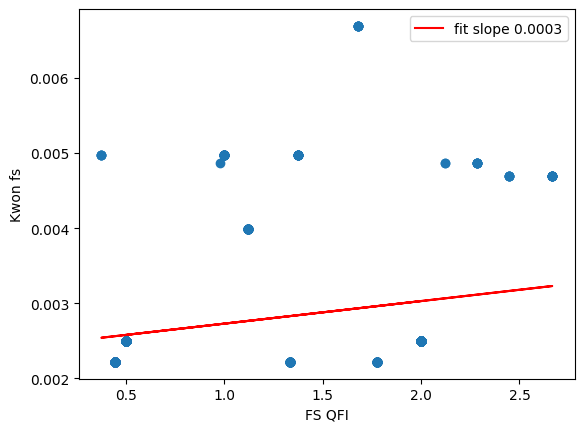

In [108]:
plt.scatter(df["qfi_fair_sampling"], kwon_fs)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["qfi_fair_sampling"], kwon_fs, 1)

# Calculate the predicted values
fit_line = slope * df["qfi_fair_sampling"] + intercept

# Plot the fit line
plt.plot(df["qfi_fair_sampling"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("FS QFI")
plt.ylabel("Kwon fs")

plt.legend()

plt.show()

In [106]:
N = 8
sigma = 3

reduced_gs = [0,(2**N) - 1]

for i,gsi in enumerate(reduced_gs):
    for j,gsj in enumerate(reduced_gs):
        kraus_factor = np.exp(-(((state_eigenvalue(i,N) - state_eigenvalue(j,N))/2)**2)/(8*(sigma**2)))
        print(kraus_factor)
        fs_rho[gsi][gsj] = fs_rho[gsj][gsi] = 1/len(reduced_gs)
        fs_phi[gsi][gsj] = fs_phi[gsj][gsi] = 1/len(reduced_gs) * kraus_factor


fs_fid = qml.math.fidelity(fs_rho,fs_phi)

# end_2 = time.time()
# print(end_2 - start_2)

# print((2 - 2*(np.sqrt(fs_fid))))

1.0
0.9862071167439163
0.9862071167439163
1.0


In [109]:
"""
8 degenerate system of three spins (happens to be a superposition of all possible states)

1/sqrt(8) * ( |000> + |001> + |010> + |011> + |100> + |101> + |110> + |111> )

Let's split it into 

|A> = 1/2 * ( |000> + |001> + |010> + |011> )
|D> = 1/2 * ( |100> + |101> + |110> + |111> )

Then D written as equation (26) is

|D> = lambda_1 mu_1

with lambda_1 = 1/2 and mu_1 = ( |100> + |101> + |110> + |111> )

because all |D> states are reachable by 1 spin flip from one of the states of |A>

then we get D_bar = (1/2)**2 * (1) = 1/4

"""

'\n8 degenerate system of three spins (happens to be a superposition of all possible states)\n\n1/2 * ( |000> + |001> + |010> + |011> + |100> + |101> + |110> + |111> )\n\n'

In [3]:
#  distinctness

import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')

import itertools as it

import data_service
from tqdm import tqdm

from database.models import InstancesN8, InstancesN12, InstancesN16


def base_N_hamming_distance(i: int, j: int, N: int) -> int:
    arr_i = np.array([int(s) for s in bin(i)[2:].zfill(N)])
    arr_j = np.array([int(s) for s in bin(j)[2:].zfill(N)])
    return int(np.sum(arr_i != arr_j))


In [170]:
N = 16

Instance = data_service.get_instance_class(N)


distinctness_list = []
overlap_list = []
qfi_list = []

with data_service.get_session() as session:

    instances  = (
        session.query(Instance).where(Instance.degeneracy > 2).where(Instance.degeneracy < 12).where(Instance.qfi_fair_sampling.is_not(None)).all()
    )

    for instance in tqdm(instances):

        gs = instance.ground_states
        deg = instance.degeneracy

        hamming_matrix = np.zeros((deg,deg))

        for i in range(deg):
            for j in range(i+1, deg):
                hamming_matrix[i][j] = hamming_matrix[j][i] = base_N_hamming_distance(gs[i],gs[j],N)


        gs_indeces = [i for i in range(deg)]
        half_perms = list(it.combinations(gs_indeces,deg//2))

        dist_list = np.zeros(len(half_perms)//2)

        for i in range(len(half_perms)//2):
            A = list(half_perms[i])
            D = list(half_perms[-1-i])
            d_list = np.zeros(deg//2)
            for j,gs_i in enumerate(D):
                d_list[j] = np.min(hamming_matrix[gs_i,A])
            dist_list[i] = np.average(d_list)

        distinctness_list.append(min(dist_list))
        overlap_list.append(instance.od_variance)
        qfi_list.append(instance.qfi_fair_sampling)

100%|██████████| 627/627 [00:00<00:00, 3363.28it/s]


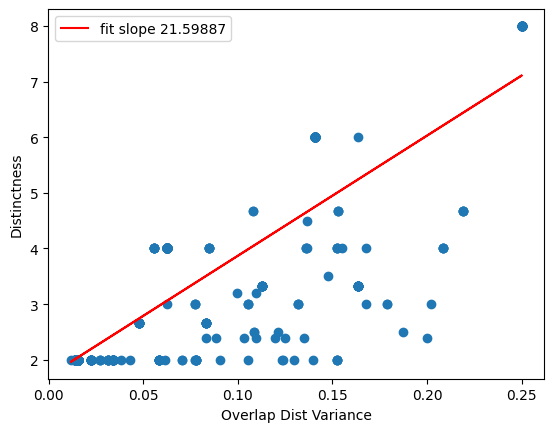

In [169]:
plt.scatter(overlap_list, distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(overlap_list, distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(overlap_list) + intercept

# Plot the fit line
plt.plot(np.array(overlap_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Overlap Dist Variance")
plt.ylabel("Distinctness")

plt.legend()

plt.show()

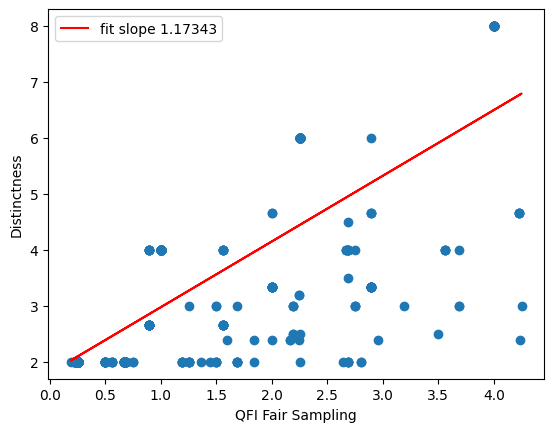

In [172]:
plt.scatter(qfi_list, distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(qfi_list, distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(qfi_list) + intercept

# Plot the fit line
plt.plot(np.array(qfi_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("QFI Fair Sampling")
plt.ylabel("Distinctness")

plt.legend()

plt.show()

In [199]:
N = 16

Instance = data_service.get_instance_class(N)


distinctness_list = []
overlap_list = []
qfi_list = []

with data_service.get_session() as session:

    instances  = (
        session.query(Instance).where(Instance.degeneracy > 2).where(Instance.degeneracy <= 30).where(Instance.qfi_fair_sampling.is_not(None)).all()
    )

    for instance in tqdm(instances):

        gs = instance.reduced_gs
        deg = instance.degeneracy // 2

        hamming_matrix = np.zeros((deg,deg))

        for i in range(deg):
            for j in range(i+1, deg):
                hamming_matrix[i][j] = hamming_matrix[j][i] = base_N_hamming_distance(gs[i],gs[j],N)


        gs_indeces = [i for i in range(deg)]
        half_perms = list(it.combinations(gs_indeces,deg//2))

        dist_list = np.zeros(len(half_perms))

        for i in range(len(half_perms)//2):
            A = list(half_perms[i])
            D = list(half_perms[-1-i])
            d_list_A_D = np.zeros(deg//2)
            d_list_D_A = np.zeros(deg//2)
            for j in range(deg//2):
                d_list_A_D[j] = np.min(hamming_matrix[D[j],A])
                d_list_D_A[j] = np.min(hamming_matrix[A[j],D])
            dist_list[i] = np.average(d_list_A_D)
            dist_list[-1-i] = np.average(d_list_D_A)

        distinctness_list.append(max(dist_list))
        overlap_list.append(instance.od_variance)
        qfi_list.append(instance.qfi_fair_sampling)

100%|██████████| 645/645 [00:00<00:00, 5480.74it/s]


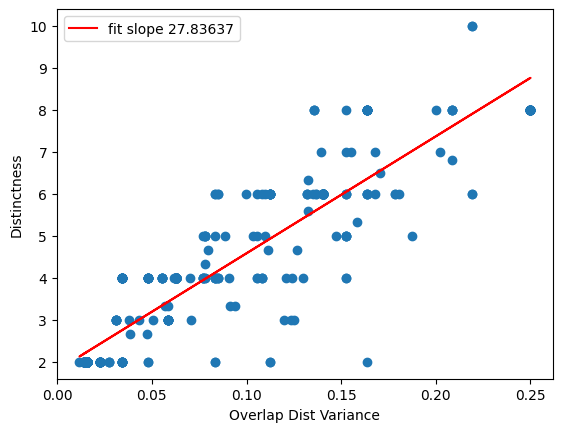

In [200]:
plt.scatter(overlap_list, distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(overlap_list, distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(overlap_list) + intercept

# Plot the fit line
plt.plot(np.array(overlap_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Overlap Dist Variance")
plt.ylabel("Distinctness")

plt.legend()

plt.show()

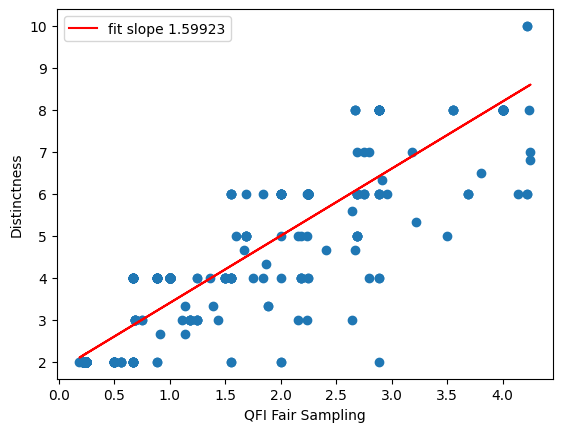

In [201]:
plt.scatter(qfi_list, distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(qfi_list, distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(qfi_list) + intercept

# Plot the fit line
plt.plot(np.array(qfi_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("QFI Fair Sampling")
plt.ylabel("Distinctness")

plt.legend()

plt.show()

In [180]:
"""
Say we have |psi> = sqrt(1/3)*|000> + sqrt(2/3) * ( sqrt(3/4)*|001> + sqrt(1/4)*|011> )

With

|A> = |000>
|D> = sqrt(3/4)*|001> + sqrt(1/4)*|011>


then we can write

D = lambda_1 mu_1 + lambda_2 mu_2

with

lambda_1 = sqrt(3/4), mu_1 = |001>
lambda_2 = sqrt(1/4), mu_2 = |011>

So distinctness Dbar = (3/4)(1) + (1/4)(2) = 5/4

where the equal superposition case would lead to 6/4 or 3/2.

However, if we have a case where |psi> = sqrt(1/1000)*|000> + sqrt(999/1000) * ( sqrt(3/4)*|001> + sqrt(1/4)*|011> )

then we still get the same distinctness which is a strange result.

Perhaps we need to weight the distinctness by the ratio of the probability of branch |A> over its fair sampling probability like

P(|A>) / Pfs(|A>) * Dbar = (1/3) / (1/3)  * Dbar =  (1)*Dbar (First case)
P(|A>) / Pfs(|A>) * Dbar = (1/1000) / (1/3)  * Dbar =  (3/1000)*Dbar (Second case)
"""


'\nSay we have |psi> = sqrt(1/2)*|000> + sqrt(1/2) * ( sqrt(3/4)*|001> + sqrt(1/4)*|011> )\n\nWith\n\n|A> = |000>\n|D> = sqrt(3/4)*|001> + sqrt(1/4)*|011>\n\n\nthen we can write\n\nD = lambda_1 mu_1 + lambda_2 mu_2\n\nwith\n\nlambda_1 = sqrt(3/4), mu_1 = |001>\nlambda_2 = sqrt(1/4), mu_2 = |011>\n\nSo distinctness = (3/4)(1) + (1/4)(2) = 5/4\n\nwhere the equal superposition case would lead to 6/4 or 3/2.\n\nHowever, if we have a case where |psi> = sqrt(1/1000)*|000> + sqrt(999/1000) * ( sqrt(3/4)*|001> + sqrt(1/4)*|011> )\n\nthen we still get the same distinctness which is a strange result. Perhaps we need to weight the distinctness by the ratio of the probability of branch |A> overits fair sampling pro\n'

In [181]:
(1/1000)/(1/3)

0.003

In [6]:
# Non Fair Sampling Distinctness

N = 16

Instance = data_service.get_instance_class(N)


pa_distinctness_list = []
pa_overlap_list = []
pa_qfi_list = []

with data_service.get_session() as session:

    instances  = (
        session.query(Instance).where(Instance.degeneracy > 2).where(Instance.degeneracy <= 30).where(Instance.qfi_fair_sampling.is_not(None)).all()
    )

    for instance in tqdm(instances):

        gs = instance.reduced_gs
        deg = instance.degeneracy // 2
        pa_gs_probs = np.array(instance.post_anneal_gs_probs)

        hamming_matrix = np.zeros((deg,deg))

        for i in range(deg):
            for j in range(i+1, deg):
                hamming_matrix[i][j] = hamming_matrix[j][i] = base_N_hamming_distance(gs[i],gs[j],N)

        gs_indeces = [i for i in range(deg)]
        splittings = []
        for D in it.combinations(gs_indeces,deg//2):
            A = tuple(gs for gs in gs_indeces if gs not in D)
            splittings.append((D,A))

        dist_list = np.zeros(len(splittings))

        for i in range(len(splittings)):
            D = list(splittings[i][0])
            A = list(splittings[i][1])
            if np.sum(pa_gs_probs[A]) < np.sum(pa_gs_probs[D]):
                A,D = D,A

            d_list = np.zeros(len(D))
            for j, gs_j in enumerate(D):
                d_list[j] = np.min(hamming_matrix[gs_j,A])*pa_gs_probs[gs_j]
            dist_list[i] = 2*np.sum(d_list)

        pa_distinctness_list.append(max(dist_list))
        pa_overlap_list.append(instance.post_anneal_od_variance)
        pa_qfi_list.append(instance.qfi_post_anneal)


"""
A = 1/sqrt(2) * |000> 

D =  sqrt(1/1000) * |010> + sqrt(499/1000) |001>

D = 1/sqrt(2) * sqrt(2) * (sqrt(1/1000) * |010> + sqrt(499/1000) |001>)


D = lambda_1 nu_1

lambda_1 = sqrt(1/2)
nu_1 = sqrt(2) * (sqrt(1/1000) * |010> + sqrt(499/1000) |001>)


Dbar  = 1

"""

100%|██████████| 645/645 [00:00<00:00, 3275.84it/s]


'\nA = 1/sqrt(2) * |000> \n\nD =  sqrt(1/1000) * |010> + sqrt(499/1000) |001>\n\nD = 1/sqrt(2) * sqrt(2) * (sqrt(1/1000) * |010> + sqrt(499/1000) |001>)\n\n\nD = lambda_1 nu_1\n\nlambda_1 = sqrt(1/2)\nnu_1 = sqrt(2) * (sqrt(1/1000) * |010> + sqrt(499/1000) |001>)\n\n\nDbar  = 1\n\n'

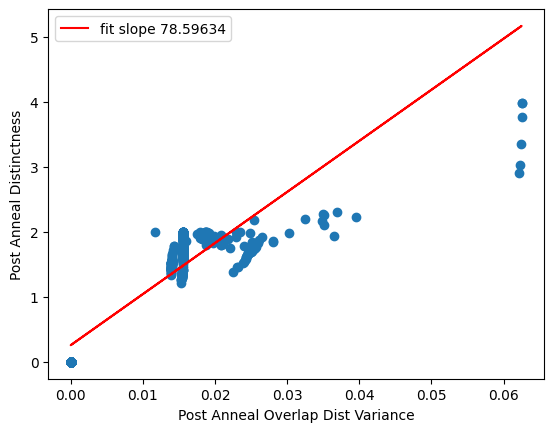

In [7]:
plt.scatter(pa_overlap_list, pa_distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(pa_overlap_list, pa_distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(pa_overlap_list) + intercept

# Plot the fit line
plt.plot(np.array(pa_overlap_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Post Anneal Overlap Dist Variance")
plt.ylabel("Post Anneal Distinctness")



plt.legend()

plt.show()

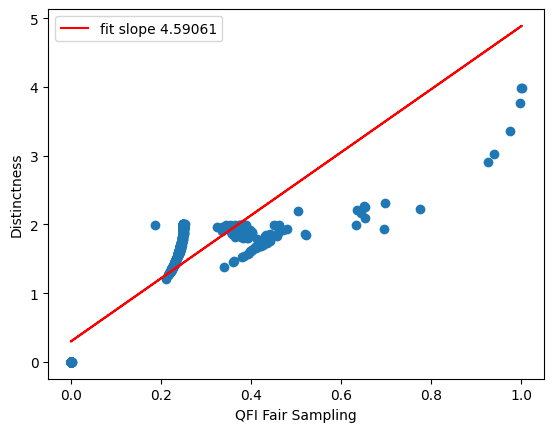

In [8]:
plt.scatter(pa_qfi_list, pa_distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(pa_qfi_list, pa_distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(pa_qfi_list) + intercept

# Plot the fit line
plt.plot(np.array(pa_qfi_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("QFI Fair Sampling")
plt.ylabel("Distinctness")

plt.legend()

plt.show()

In [9]:
import matplotlib.pyplot as plt


y_limits = (0, len(distinctness_list)) 


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the first histogram
ax1.hist(distinctness_list, bins=11, range = [0,12], edgecolor='black')
ax1.set_title('Fair')
ax1.set_xlabel('Distinctness')
ax1.set_ylabel('Frequency')
ax1.set_ylim(y_limits)

# Create the second histogram
ax2.hist(pa_distinctness_list, bins=11, range = [0,12], edgecolor='black')
ax2.set_title('Post Annealing')
ax2.set_xlabel('Distinctness')
ax2.set_ylabel('Frequency')
ax2.set_ylim(y_limits)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

NameError: name 'distinctness_list' is not defined

In [212]:
"""

A = sqrt(1/1000) |b> + sqrt(500/1000) |c>
D = sqrt(499/1000) |a>

|a> is 2 hd from |b>
|a> is N-2 hd from |c>


D = lambda_2 mu_2
lambda_2 = sqrt(499/1000)
mu_2 = |a>

Dbar = 2 * ( 2 * 499/1000 ) ~= 2


but this feels like it should be more like N-2

"""

'\n\nA = sqrt(1/1000) |b> + sqrt(500/1000) |c>\nD = sqrt(499/1000) |a>\n\n|a> is 2 hd from |b>\n|a> is N-2 hd from |c>\n\n\nD = lambda_2 mu_2\nlambda_2 = sqrt(499/1000)\nmu_2 = |a>\n\nDbar = 2 * ( 2 * 499/1000 ) ~= 2\n\n\nbut this feels like it should be more like N-2\n\n'

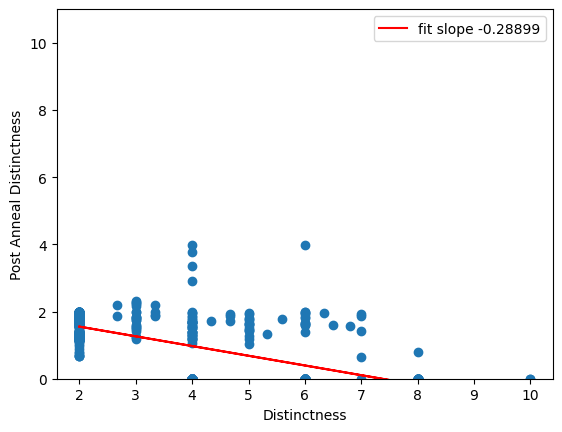

In [218]:
plt.scatter(distinctness_list, pa_distinctness_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(distinctness_list, pa_distinctness_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(distinctness_list) + intercept

# Plot the fit line
plt.plot(np.array(distinctness_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Distinctness")
plt.ylabel("Post Anneal Distinctness")

plt.ylim(0,11)



plt.legend()

plt.show()

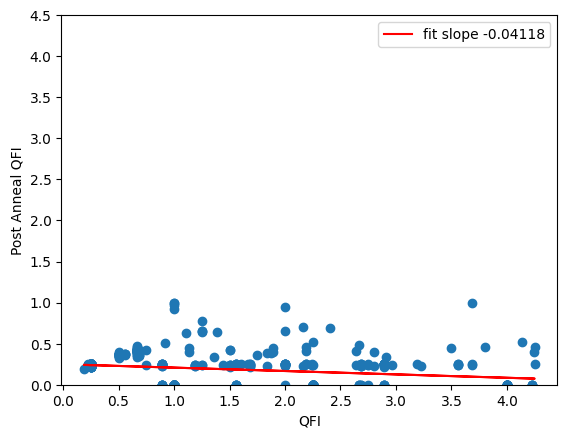

In [220]:
plt.scatter(qfi_list, pa_qfi_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(qfi_list, pa_qfi_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(qfi_list) + intercept

# Plot the fit line
plt.plot(np.array(qfi_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("QFI")
plt.ylabel("Post Anneal QFI")

plt.ylim(0,4.5)



plt.legend()

plt.show()

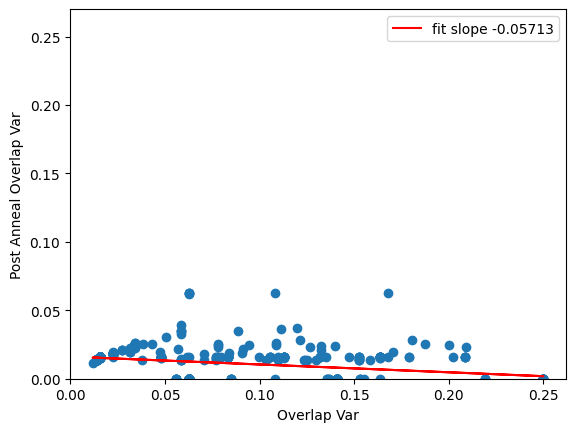

In [224]:
plt.scatter(overlap_list, pa_overlap_list)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(overlap_list, pa_overlap_list, 1)

# Calculate the predicted values
fit_line = slope * np.array(overlap_list) + intercept

# Plot the fit line
plt.plot(np.array(overlap_list), fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.xlabel("Overlap Var")
plt.ylabel("Post Anneal Overlap Var")

plt.ylim(0,0.27)



plt.legend()

plt.show()

In [ ]:
gs = instance.reduced_gs
deg = instance.degeneracy // 2
pa_gs_probs = np.array(instance.post_anneal_gs_probs)

hamming_matrix = np.zeros((deg,deg))

for i in range(deg):
    for j in range(i+1, deg):
        hamming_matrix[i][j] = hamming_matrix[j][i] = base_N_hamming_distance(gs[i],gs[j],N)

if instance.seed == 29:
    print(hamming_matrix)
gs_indeces = [i for i in range(deg)]
half_perms = list(it.combinations(gs_indeces,deg//2))

dist_list = np.zeros(len(half_perms)//2)

for i in range(len(half_perms)//2):
    A = list(half_perms[i])
    D = list(half_perms[-1-i])
    if np.sum(pa_gs_probs[A]) < np.sum(pa_gs_probs[D]):
        A,D = D,A

    d_list = np.zeros(deg//2)
    for j, gs_j in enumerate(D):
        d_list[j] = np.min(hamming_matrix[gs_j,A])*pa_gs_probs[gs_j]
    dist_list[i] = 2*np.sum(d_list)

pa_distinctness_list.append(max(dist_list))
pa_overlap_list.append(instance.post_anneal_od_variance)
pa_qfi_list.append(instance.qfi_post_anneal)